<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/11_visualising_ND_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising ND data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import manifold  


df = pd.read_csv("heart.csv")

target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head(2)

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187


## Scatter matrix

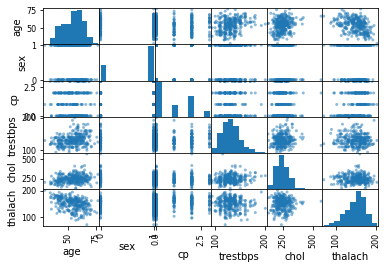

In [4]:
pd.plotting.scatter_matrix(df);

## Correlation matrix

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


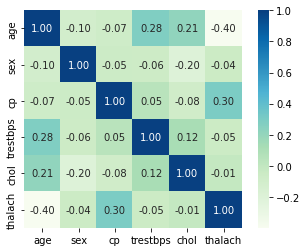

In [13]:
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True, cmap="GnBu")

## 4 dimensional spiral

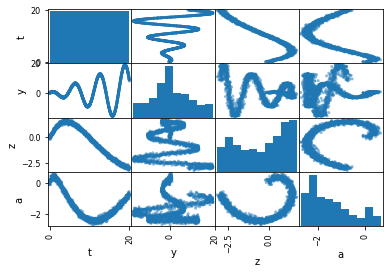

In [19]:
np.random.seed(0)
n = 2000
t = np.linspace(0, 20, n)
x = t*np.sin(t) + 0.2 * np.random.normal(size=n)
y = t*np.cos(t) + 0.2 * np.random.normal(size=n)
z = np.log(t+1) * np.sin(np.sqrt(t)) + 0.1 * np.random.normal(size=n)
a = np.log(t+1) * np.cos(np.sqrt(t)) + 0.1 * np.random.normal(size=n)

df2 = pd.DataFrame({"t":t , "y": y, "z": z, "a": a})
data = df2.to_numpy()
pd.plotting.scatter_matrix(df2);


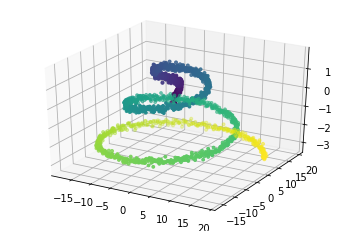

In [28]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=t, s=10+a);

## Manifold learning


Running LLE
Running LTSA
Running Hessian LLE
Running Modified LLE
Running Isomap


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/s

Running MDS
Running SE
Running t-SNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


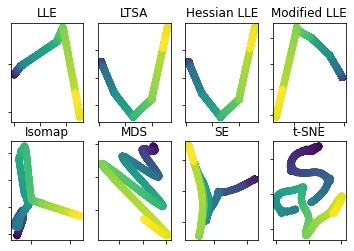

In [29]:
methods = [
    ("LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='standard')),
    ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors=20, method='ltsa')),
    ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='hessian')),
    ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='modified')),
    ("Isomap", manifold.Isomap()),
    ("MDS", manifold.MDS(n_init=1)),
    ("SE", manifold.SpectralEmbedding()),
    ("t-SNE", manifold.TSNE()),
]

fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    Y = method.fit_transform(data)
    ax.scatter(Y[:, 0], Y[:, 1], c=t)
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Running LLE
Running LTSA
Running Hessian LLE


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:937: LinAlgWarning: Diagonal number 86 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Method Hessian LLE failed
Running Modified LLE
Running Isomap
Running MDS
Running SE
Running t-SNE


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


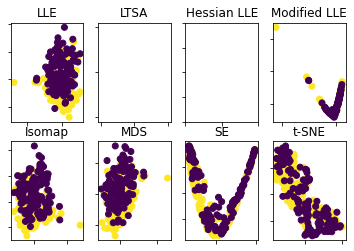

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    try:
        Y = method.fit_transform(df.to_numpy())
        ax.scatter(Y[:, 0], Y[:, 1], c=target)
    except Exception:
        print(f"Method {name} failed")
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])